# Hertzsprung–Russell diagram
Stellar evolution data is stored in `sev.83_[time]` files, where the time is given in nbody units.

Let's have a look at the first `sev.83_0` file. Note that purposely only the first 10 lines and the header are shown. Furthermore some columns are cut for the sake of brevity.

In [1]:
with open("example_1k/sev.83_0", "r") as myfile:
    # print header
    print(myfile.readline().replace("\n",""))
    # print first ten lines of stellar evolution data
    for i in range(0,10):
        print(myfile.readline()[:60].replace("\n","") + " [...]")

    1000      0.0
   0.00000E+00       1       1  1  2.51606E+00  5.25373E+01  [...]
   0.00000E+00       2       2  1  2.29434E+00  2.66005E+01  [...]
   0.00000E+00       3       3  1  8.72258E+00  1.97269E+01  [...]
   0.00000E+00       4       4  1  1.02014E+00  1.37391E+01  [...]
   0.00000E+00       5       5  1  1.54393E+00  1.16746E+01  [...]
   0.00000E+00       6       6  1  1.74069E+00  9.48461E+00  [...]
   0.00000E+00       7       7  1  1.45003E+00  9.24989E+00  [...]
   0.00000E+00       8       8  1  4.64537E+00  7.04640E+00  [...]
   0.00000E+00       9       9  1  8.03392E-01  6.10987E+00  [...]
   0.00000E+00      10      10  1  2.90117E+00  5.78393E+00  [...]


We do not know, what the columns mean, but looking at the [manual](https://github.com/shad0wfax-de/Nbody6PPGPU-beijing/tree/stable/doc) we find
<img src=res/02_HRD_manual.png>

We can now extract the column names. As we are looking at just one `sev.83` with all data at the same point in time, the `TIME[NB]` column will be skipped over.

In [2]:
# import some useful libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# define column names
COLS = ["I", "NAME", "K*", "RI[RC]", "M[M*]", "log10(L[L*])", "log10(RS[R*])", "log10(Teff[K])"]

# read pandas DataFrame from csv
df = pd.read_csv("example_1k/sev.83_0",
                 delim_whitespace=True, # Make pandas use whitespace(s) as anbody does
                 skiprows = 1, # skip the header
                 names = COLS, # assign column names
                 usecols=range(1,len(COLS) + 1) # ignore the time coloumn
                 )
df

,I,NAME,K*,RI[RC],M[M*],log10(L[L*]),log10(RS[R*]),log10(Teff[K])
0,1,1,1,2.516060,52.537300,5.57510,0.890588,4.71026
1,2,2,1,2.294340,26.600500,4.92389,0.723003,4.63125
2,3,3,1,8.722580,19.726900,4.59654,0.645161,4.58833
3,4,4,1,1.020140,13.739100,4.16783,0.549341,4.52907
4,5,5,1,1.543930,11.674600,3.96428,0.505943,4.49988
...,...,...,...,...,...,...,...,...
995,996,996,0,2.477800,0.080752,-3.26329,-0.816145,3.35403
996,997,997,0,3.337520,0.080735,-3.26366,-0.816115,3.35392
997,998,998,0,3.188000,0.080733,-3.26372,-0.816111,3.35390
998,999,999,0,0.684293,0.080726,-3.26387,-0.816099,3.35386


## Plotting
After extracting the data we can continue plot our HRD.

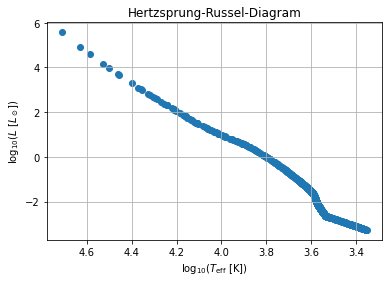

In [4]:
# Initialize figure
fig = plt.figure()
ax = fig.gca()

# plot
ax.scatter(df["log10(Teff[K])"], df["log10(L[L*])"])

# make the plot look nice
ax.set_title("Hertzsprung-Russel-Diagram")
# typical for HRDs
ax.invert_xaxis()

ax.set_xlabel(r"$\mathrm{log}_{10}(T_\mathrm{eff}$ [K])")
ax.set_ylabel(r"$\mathrm{log}_{10}(L$ [$L_\odot]$)")
ax.grid()